In [1]:
#import os
#import zipfile
from pathlib import Path
from kaggle.api.kaggle_api_extended import KaggleApi

In [2]:
api = KaggleApi()
api.authenticate()

dataset = "mubashirrahim/wind-power-generation-data-forecasting"
download_folder = Path("../data/external/wind-power-generation-data")
download_folder.mkdir(parents=True, exist_ok=True)

api.dataset_download_files(dataset, path=str(download_folder), unzip=True)

Dataset URL: https://www.kaggle.com/datasets/mubashirrahim/wind-power-generation-data-forecasting


In [3]:
!dir "../data/external/wind-power-generation-data"

 Volume in drive C has no label.
 Volume Serial Number is 5AFA-ECCE

 Directory of c:\Users\Kamil\WWSI\dev\MachineLearning\ARISA-MLOps-Final\data\external\wind-power-generation-data

15.05.2025  00:42    <DIR>          .
05.05.2025  00:03    <DIR>          ..
15.05.2025  00:42         2�706�003 Location1.csv
15.05.2025  00:42         2�710�343 Location2.csv
15.05.2025  00:42         2�695�239 Location3.csv
15.05.2025  00:42         2�700�716 Location4.csv
15.05.2025  00:42             1�358 readme.txt
               5 File(s)     10�813�659 bytes
               2 Dir(s)  58�985�865�216 bytes free


In [4]:
import pandas as pd

df = pd.read_csv(download_folder / "Location1.csv")

df.head(10)

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793
5,2017-01-02 05:00:00,27.6,90,25.2,2.73,5.59,66,80,4.5,0.0778
6,2017-01-02 06:00:00,26.7,92,24.9,2.10,5.82,65,78,4.7,0.0959
7,2017-01-02 07:00:00,28.4,91,26.1,3.10,6.24,69,78,4.8,0.1141
8,2017-01-02 08:00:00,30.2,88,27.0,3.54,6.89,74,81,5.8,0.1322
9,2017-01-02 09:00:00,34.0,82,29.1,3.44,6.01,82,86,6.5,0.1503


## Data overview
* **Time** - Hour of the day when readings occurred
* **temperature_2m** - Temperature in degrees Fahrenheit at 2 meters above the surface
* **relativehumidity_2m** - Relative humidity (as a percentage) at 2 meters above the surface
* **dewpoint_2m** - Dew point in degrees Fahrenheit at 2 meters above the surface
* **windspeed_10m** - Wind speed in meters per second at 10 meters above the surface
* **windspeed_100m** - Wind speed in meters per second at 100 meters above the surface
* **winddirection_10m** - Wind direction in degrees (0-360) at 10 meters above the surface
* **winddirection_100m** - Wind direction in degrees (0-360) at 100 meters above the surface
* **windgusts_10m** - Wind gusts in meters per second at 100 meters above the surface
* **Power** - Turbine output, normalized to be between 0 and 1 (i.e., a percentage of maximum potential output)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 43800 non-null  object 
 1   temperature_2m       43800 non-null  float64
 2   relativehumidity_2m  43800 non-null  int64  
 3   dewpoint_2m          43800 non-null  float64
 4   windspeed_10m        43800 non-null  float64
 5   windspeed_100m       43800 non-null  float64
 6   winddirection_10m    43800 non-null  int64  
 7   winddirection_100m   43800 non-null  int64  
 8   windgusts_10m        43800 non-null  float64
 9   Power                43800 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 3.3+ MB


In [6]:
df.isnull().sum()

Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
dtype: int64

In [7]:
df['Time'] = pd.to_datetime(df['Time'])
df['Year']=df['Time'].dt.year
df['Month']=df['Time'].dt.month
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Time                 43800 non-null  datetime64[ns]
 1   temperature_2m       43800 non-null  float64       
 2   relativehumidity_2m  43800 non-null  int64         
 3   dewpoint_2m          43800 non-null  float64       
 4   windspeed_10m        43800 non-null  float64       
 5   windspeed_100m       43800 non-null  float64       
 6   winddirection_10m    43800 non-null  int64         
 7   winddirection_100m   43800 non-null  int64         
 8   windgusts_10m        43800 non-null  float64       
 9   Power                43800 non-null  float64       
 10  Year                 43800 non-null  int64         
 11  Month                43800 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(5)
memory usage: 4.0 MB


In [8]:
df.describe()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Year,Month
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,47.862911,72.288744,38.569308,3.591147,6.284431,203.637329,203.343676,7.771795,0.405385,2019.001644,6.526575
std,19.453691,16.852287,18.772110,1.649318,2.685216,96.371262,97.959852,3.569147,0.288322,1.413647,3.447092
min,-14.400000,18.000000,-17.100000,0.000000,0.100000,1.000000,0.000000,0.500000,0.000000,2017.000000,1.000000
25%,32.100000,60.000000,24.300000,2.410000,4.380000,132.000000,130.000000,5.000000,0.148900,2018.000000,4.000000
50%,47.300000,74.000000,38.100000,3.300000,6.080000,225.000000,226.000000,7.200000,0.347650,2019.000000,7.000000
75%,64.500000,86.000000,54.700000,4.590000,7.990000,277.000000,278.000000,10.000000,0.659600,2020.000000,10.000000
max,94.100000,100.000000,76.300000,13.450000,20.650000,360.000000,360.000000,29.200000,0.991300,2021.000000,12.000000


In [9]:
# Features & Target
features = ['Year', 'Month', 'temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m', 'windspeed_100m',
            'winddirection_10m', 'winddirection_100m', 'windgusts_10m']
target = 'Power'

In [10]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)
X_train, y_train = train_data[features], train_data[target]
X_test, y_test = test_data[features], test_data[target]

In [11]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [12]:
prediction = model.predict(X_test)

In [13]:
accuracy = model.score(X_train,y_train)
accuracy

0.967191709891625

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluate model accuracy using various metrics
mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, prediction)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")
print("")

Mean Absolute Error (MAE): 0.10459873190639268
Mean Squared Error (MSE): 0.02002900712580551
Root Mean Squared Error (RMSE): 0.14152387475548256
R-squared (R2): 0.7579648732368214



In [15]:
import joblib
# Save the trained model
joblib.dump(model, "../models/power_random_forest_regressor_model.pkl")

['../models/power_random_forest_regressor_model.pkl']

In [16]:
import optuna

outfolder = Path("results")
outfolder.mkdir(parents=True, exist_ok=True)

best_params_path = outfolder / "best_params_optuna.pkl"

if not best_params_path.is_file():
    X_train_opt, X_val_opt, y_train_opt, y_val_opt = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
    
    def objective(trial):
        n_estimators = trial.suggest_int("n_estimators", 10, 200, log=True)
        max_depth = trial.suggest_int("max_depth", 2, 32)
        min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
        min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

        model = RandomForestRegressor(
                n_estimators=n_estimators,
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf,
                random_state=42,
            )
        
        model.fit(X_train_opt, y_train_opt)
        y_pred = model.predict(X_val_opt)
        mae = mean_absolute_error(y_val_opt, y_pred)
        return mae
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=50, show_progress_bar = True)
    
    joblib.dump(study.best_params, best_params_path)
    params = study.best_params
else:
    params = joblib.load(best_params_path)
print("Best Parameters:", params)

Best Parameters: {'n_estimators': 166, 'max_depth': 30, 'min_samples_split': 3, 'min_samples_leaf': 1}


In [17]:
# Train the final model with the best parameters
model = RandomForestRegressor(
    n_estimators=params["n_estimators"],
    max_depth=params["max_depth"],
    min_samples_split=params["min_samples_split"],
    min_samples_leaf=params["min_samples_leaf"],
    random_state=42,
)

model.fit(X_train, y_train)

accuracy = model.score(X_train,y_train)
accuracy
print("Final accuracy with best params:", accuracy)

# Save the trained model
joblib.dump(model, outfolder / "power_random_forest_regressor_model_optuna.pkl")

Final accuracy with best params: 0.9637299821419563


['results\\power_random_forest_regressor_model_optuna.pkl']

In [ ]:
# Cross-validation with GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [10, 100, 200],
    'max_depth': [2, 10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_grid,
    scoring='neg_mean_absolute_error',
    cv=5,
    n_iter=10,
    verbose=1,
    n_jobs=-1,
    return_train_score=True,
    random_state=42,
)

random_search.fit(X_train, y_train)
best_params = random_search.best_params_
print("Best Parameters from RandomizedSearchCV:", best_params)
# Save cv results to csv

cv_results_df = pd.DataFrame(random_search.cv_results_)
cv_results_df['iteration'] = range(0, len(cv_results_df))
cv_results_df.to_csv(outfolder / "cv_results.csv", index=False)

# Train the final model with the best parameters from GridSearchCV
model = RandomForestRegressor(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    min_samples_leaf=best_params["min_samples_leaf"],
    random_state=42,
)

model.fit(X_train, y_train)
accuracy = model.score(X_train,y_train)
print("Final accuracy with best params from RandomizedSearchCV:", accuracy)

c:\Users\Kamil\WWSI\dev\MachineLearning\ARISA-MLOps-Final\.venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters from RandomizedSearchCV: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Final accuracy with best params from RandomizedSearchCV: 0.9670969569799138


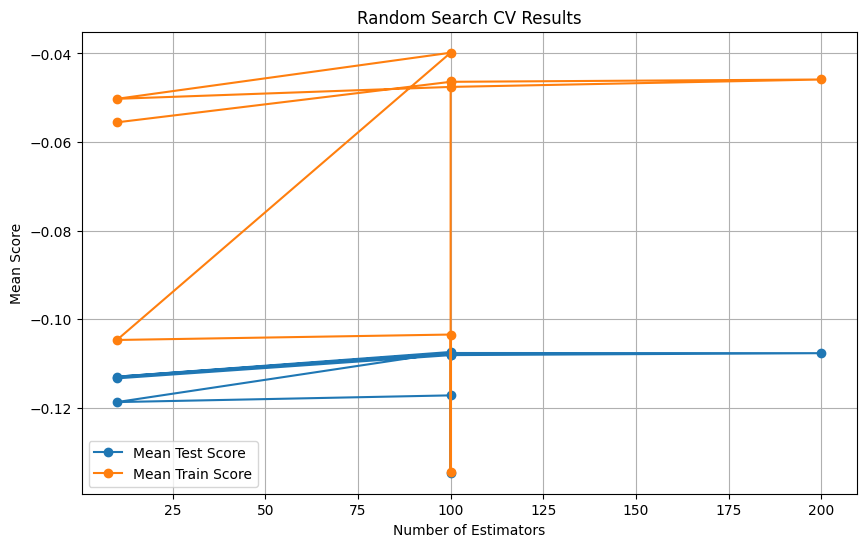

In [19]:
# Plot random search results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(cv_results_df['param_n_estimators'], cv_results_df['mean_test_score'], marker='o', label='Mean Test Score')
plt.plot(cv_results_df['param_n_estimators'], cv_results_df['mean_train_score'], marker='o', label='Mean Train Score')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Score')
plt.title('Random Search CV Results')
plt.legend()
plt.grid()
plt.savefig(outfolder / "random_search_cv_results.png")
plt.show()

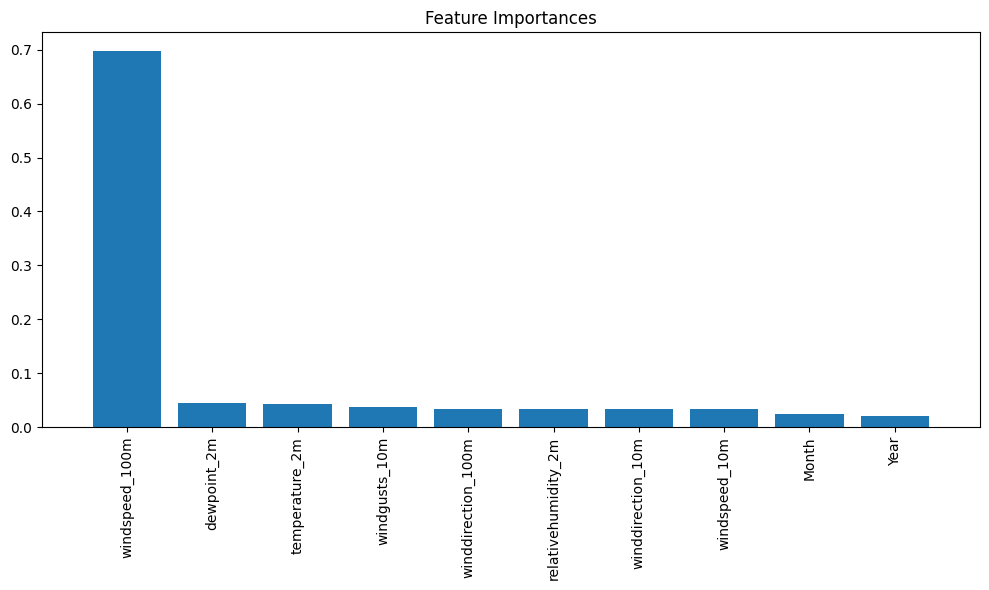

In [20]:
# Load the best model
model = joblib.load(outfolder / "power_random_forest_regressor_model_optuna.pkl")

# Plot feature importance
import matplotlib.pyplot as plt
importances = model.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.savefig(outfolder / "feature_importances.png")
plt.show()

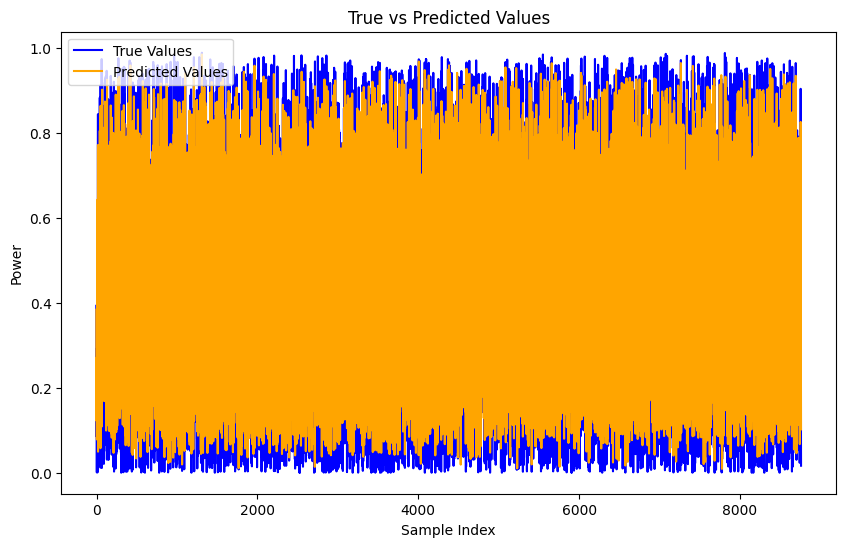

In [21]:
# Plotting the predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='True Values', color='blue')
plt.plot(prediction, label='Predicted Values', color='orange')
plt.title('True vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Power')
plt.legend()
plt.savefig(outfolder / "true_vs_predicted.png")
plt.show()

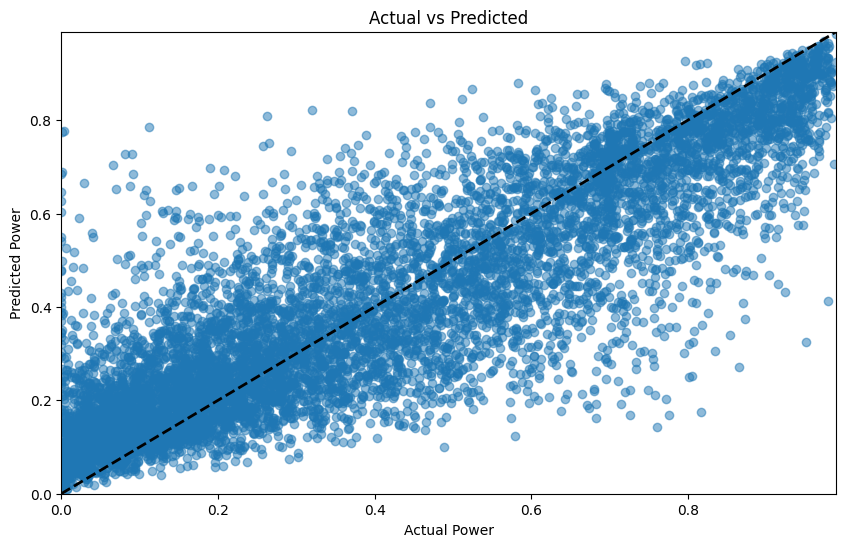

In [22]:
#Actual vs. Prediction

plt.figure(figsize=(10, 6))
plt.scatter(y_test, prediction, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Power')
plt.ylabel('Predicted Power')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.savefig(outfolder / "actual_vs_predicted.png")
plt.show()